# Since we know that workweek-days have consistent ridership, let's break down the average workday by 4-hour periods
This shows the average ridership per period for the top 30 stations. I think it quite clearly shows that rush hour periods are the most well-traveled periods on workdays.

In [1]:
%pylab inline
import numpy as np
import pandas as pd
from os.path import join, isfile
from os import listdir
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white") #lolidk

Populating the interactive namespace from numpy and matplotlib


In [2]:
## SET THESE VALUES TO CUSTOMIZE CHART AT END
number_of_stations = 30                                   # will get top X stations by total traffic
acceptable_times = ['00:00:00', '04:00:00', '08:00:00', '12:00:00', '16:00:00', '20:00:00']

In [3]:
dataframes = []

for filepath in [join('BensonData', f) for f in listdir('BensonData')]:
    new_df = pd.read_csv(filepath, index_col=0)
    dataframes.append(new_df)

df1 = pd.concat(dataframes)
df1.reset_index(inplace=True)

In [4]:
df2 = (df1[df1['DWEEKDAY'] < 5].sort_values(by=['STATION', 'LINENAME'])
          .groupby(['STATION', 'LINENAME'])['TOTAL_TRAFFIC']
          .sum())

In [5]:
df2.sort_values(ascending=False, inplace=True)
df2[:number_of_stations]

STATION          LINENAME    
GRD CNTRL-42 ST  4567S           24490130.0
34 ST-HERALD SQ  BDFMNQRW        18234734.0
34 ST-PENN STA   ACE             12912245.0
14 ST-UNION SQ   LNQR456W        11599743.0
42 ST-PORT AUTH  ACENQRS1237W    11286282.0
FULTON ST        2345ACJZ        10725626.0
TIMES SQ-42 ST   1237ACENQRSW    10384668.0
47-50 STS ROCK   BDFM            10227542.0
PATH NEW WTC     1                9460392.0
59 ST COLUMBUS   ABCD1            8954471.0
FLUSHING-MAIN    7                8579906.0
34 ST-PENN STA   123ACE           7682644.0
JKSN HT-ROOSVLT  EFMR7            7262594.0
LEXINGTON AV/53  EM6              7078825.0
42 ST-BRYANT PK  BDFM7            7030976.0
86 ST            456              7012740.0
59 ST            456NQRW          6908876.0
W 4 ST-WASH SQ   ABCDEFM          6716090.0
CANAL ST         JNQRZ6W          6494445.0
96 ST            123              6223598.0
72 ST            123              5692409.0
34 ST-PENN STA   123              5635273.0
JA

In [6]:
# setup filtering df1 to the topX station-linename combinations
df1.set_index(['STATION', 'LINENAME'], inplace=True)
topX_totaltraffic = df2[:number_of_stations]
stlntuples = topX_totaltraffic.index.tolist()

# filter df1 to workdays-only, topX stations, acceptable times (multiples of 4)
minidf1 = df1[(df1['DWEEKDAY'] < 5)&(df1.index.isin(stlntuples))&(df1['TIME'].isin(acceptable_times))]

In [7]:
df_time_means = (minidf1.sort_values(by=['STATION', 'LINENAME']).reset_index()
                    .groupby(['STATION', 'LINENAME', 'TIME']).sum().reset_index()
                    .groupby(['TIME']).mean())

In [8]:
df_time_means.reset_index(inplace=True)
df_time_means = df_time_means.reindex([1,2,3,4,5,0]) # move midnight to the end because it's 8pm-midnight
df_time_means.set_index(['TIME'], inplace=True)

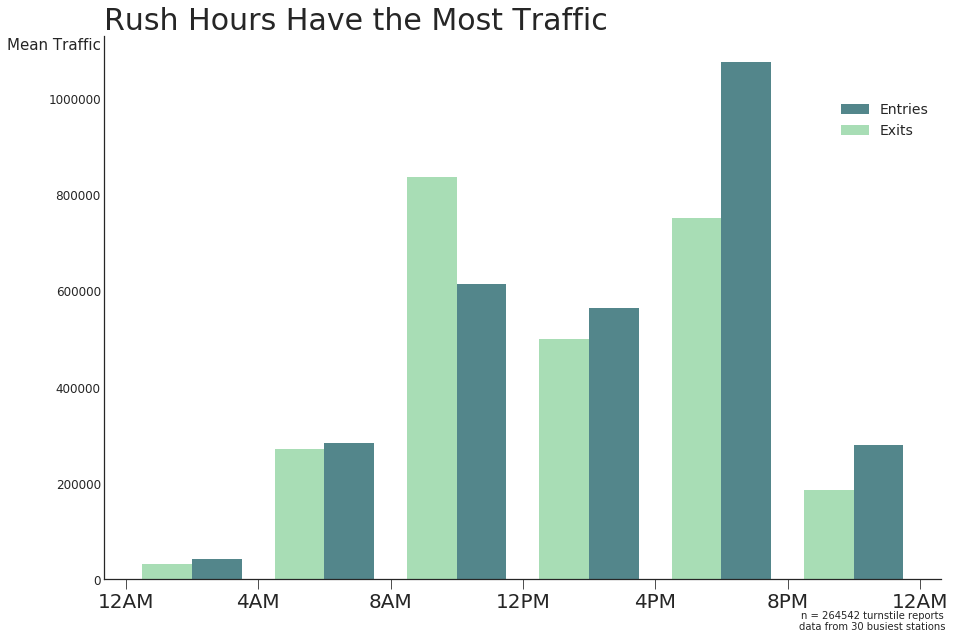

In [11]:
plt.figure(figsize=[15,10])

#plt.bar(np.arange(0,24,4), df_time_means['TOTAL_TRAFFIC'], width=2)

plt.bar(np.arange(0,24,4), df_time_means['ENTRY_DIFFS'], width=1.5, align='edge', label='Entries', color = '#53868B')
plt.bar(np.arange(-1.5,22.5,4), df_time_means['EXIT_DIFFS'], width=1.5, align='edge', label='Exits', color = '#a8ddb5')

timeperiod_labels = ['12AM', '4AM', '8AM', '12PM', '4PM', '8PM', '12AM']

ax = plt.gca()
plt.title("Rush Hours Have the Most Traffic", size=30, loc='left')
plt.xticks(np.arange(-2,26,4), timeperiod_labels, size=20)
plt.yticks(np.arange(0,1200000,200000), size =12)
plt.legend(bbox_to_anchor=[1,0.9], fontsize=14)
plt.ylabel("Mean Traffic", rotation=0, labelpad = 75, size = 15)
sns.despine()
ax.yaxis.set_label_coords(-0.06, 0.97)
ax.tick_params(axis='x', length=10)
plt.gcf().text(0.77,0.07, "n = 264542 turnstile reports")
plt.gcf().text(0.768,0.055, "data from 30 busiest stations")
plt.savefig('TimeofDay-Test.png')

In [10]:
minidf1.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 264542 entries, (34 ST-HERALD SQ, BDFMNQRW) to (GRD CNTRL-42 ST, 4567S)
Data columns (total 17 columns):
index            264542 non-null int64
C/A              264542 non-null object
UNIT             264542 non-null object
SCP              264542 non-null object
DIVISION         264542 non-null object
DATE             264542 non-null object
TIME             264542 non-null object
DESC             264542 non-null object
ENTRIES          264542 non-null int64
EXITS            264542 non-null int64
DATETIME         264542 non-null object
WEEKDAY          264542 non-null int64
ENTRY_DIFFS      251582 non-null float64
EXIT_DIFFS       254628 non-null float64
TOTAL_TRAFFIC    250216 non-null float64
DDATE            264542 non-null object
DWEEKDAY         264542 non-null int64
dtypes: float64(3), int64(5), object(9)
memory usage: 35.1+ MB
